In [1]:
# 윈도우
%matplotlib notebook
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib.font_manager import fontManager
import squarify
import matplotlib

import os

os.chdir("C:/Users/min/Desktop/code/data/weather")

gs=pd.read_csv("gs.csv",encoding='cp949',parse_dates=['date.gs'])

In [2]:
gs.head()

,reg_01.gs,date.gs,gen.gs,age.gs,cat.gs,qty.gs,reg_02.gs
0,서울특별시,2016-01-01,F,00~19,라면,7,종로구
1,서울특별시,2016-01-01,F,20~39,과자,655,종로구
2,서울특별시,2016-01-01,F,20~39,라면,282,종로구
3,서울특별시,2016-01-01,F,20~39,마스크,35,종로구
4,서울특별시,2016-01-01,F,20~39,맥주,183,종로구


In [2]:
import matplotlib as mpl
# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["font.size"] = 7
plt.rcParams["figure.figsize"] = (12,7)

In [3]:
weather = pd.read_csv("weather.csv", encoding ='CP949', parse_dates=['date.wt'])
weather_seoul = weather[weather['region_01.wt']=='서울특별시'] 
yellowdust = pd.read_csv('yellowdust.csv', encoding='cp949', skiprows = [0,1,2], parse_dates=['일자'])
yellowdust = yellowdust[yellowdust['지점명']=='서울'] 

In [4]:
# 칼럼별 이름 변경
weather_seoul.rename(columns={weather_seoul.columns[0] : '날짜',
                        weather_seoul.columns[1] : '지역번호',
                        weather_seoul.columns[2] : '지역',
                        weather_seoul.columns[3] : '지역구',
                        weather_seoul.columns[4] : '최대기온',
                        weather_seoul.columns[5] : '최대풍속',
                        weather_seoul.columns[6] : '최소기온',
                        weather_seoul.columns[7] : '평균기온',
                        weather_seoul.columns[8] : '평균상대습도',
                        weather_seoul.columns[9] : '평균풍속',
                        weather_seoul.columns[10] : '총강수량'}, inplace=True)
yellowdust.rename(columns={'일자':'날짜'}, inplace=True) # 칼럼 이름 변경
yellowdust.drop(['지점번호', '지점명'], axis=1, inplace=True) # 필요없는 칼럼 삭제

C:\Users\min\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [5]:
weather_seoul.drop('평균상대습도', axis=1, inplace=True) # 거의 절반 정도로 결측치가 많은 평균상대습도 변수 제거
weather_seoul = weather_seoul.interpolate(method='values') # 데이터 프레임 값에 선형으로 비례하는 결측값 보간

C:\Users\min\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [77]:
def rainfall(x):
    if x==0:
        return 'N'
    else:
        return 'Y' # 강수량이 0이면 'N', 아니면 'Y'로 표시

In [78]:
weather_seoul['강수유무'] = weather_seoul['총강수량'].apply(rainfall) # 강수유무 칼럼 추가

In [79]:
weather_seoul['일교차'] = weather_seoul['최대기온'] - weather_seoul['최소기온'] # 일교차(최대기온-최소기온) 변수 추가

In [80]:
weather_avg = weather_seoul.groupby(['날짜']).mean()
weather_avg.reset_index(inplace=True)

In [81]:
weather_avg = pd.merge(weather_avg, yellowdust,how='outer') # 미세먼지농도 변수 추가

In [82]:
weekday_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
weather_avg = weather_avg.replace({'dayofweek':weekday_dict})

In [83]:
# 미세먼지 결측치 보간
weather_avg['미세먼지농도(㎍/㎥)'] = weather_avg['미세먼지농도(㎍/㎥)'].interpolate(method='values')

In [84]:
weather_avg.head() # 요일 문자열로

,날짜,지역번호,최대기온,최대풍속,최소기온,평균기온,평균풍속,총강수량,일교차,미세먼지농도(㎍/㎥)
0,2016-01-01,406.68,4.928,2.608,-2.576,1.832,0.980,0.0,7.504,56.0
1,2016-01-02,406.68,10.088,3.100,2.572,6.472,1.296,0.0,7.516,42.0
2,2016-01-03,406.68,9.516,2.648,4.468,6.592,0.924,0.0,5.048,86.0
3,2016-01-04,406.68,6.784,4.120,-2.060,2.800,2.132,0.0,8.844,73.0
4,2016-01-05,406.68,1.592,3.660,-3.824,-1.760,1.704,0.0,5.416,31.0


In [85]:
weather_avg.isnull().sum()

날짜             0
지역번호           0
최대기온           0
최대풍속           0
최소기온           0
평균기온           0
평균풍속           0
총강수량           0
일교차            0
미세먼지농도(㎍/㎥)    0
dtype: int64

1. 평균기온

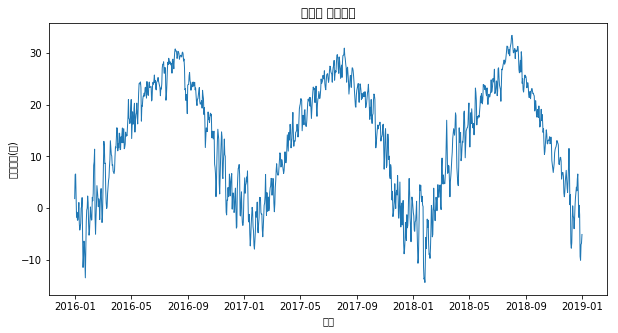

In [86]:
plt.figure(figsize=(10,5))
plt.plot(weather_avg['날짜'], weather_avg['평균기온'])
plt.title('날짜별 평균기온')
plt.xlabel('날짜')
plt.ylabel('평균기온(도)')
plt.show()

2. 월강수량

In [87]:
def separate_date(data):
    data["year"] = data["날짜"].dt.year
    data["month"] = data["날짜"].dt.month
    data["day"] = data["날짜"].dt.day
    data["dayofweek"] = data["날짜"].dt.dayofweek # 날짜를 년, 월, 일, 요일로 나누기
separate_date(weather_avg)

weekday_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
weather_avg = weather_avg.replace({'dayofweek':weekday_dict})
weather_avg.set_index('날짜', inplace=True)
weather_month = weather_avg.groupby(['month']).mean()

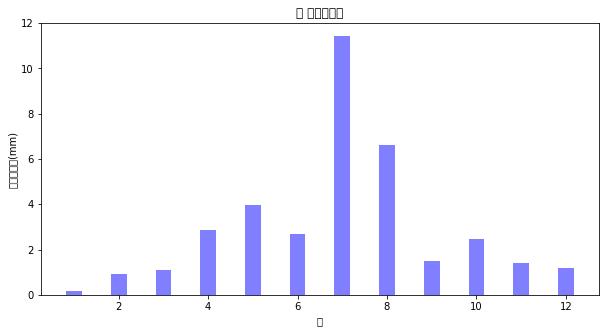

In [88]:
plt.figure(figsize=(10,5))
bar_width = 0.35
opacity = 0.5
plt.bar(weather_month.index, weather_month['총강수량'], bar_width, alpha = opacity, color='b')
plt.title('월 평균강수량')
plt.xlabel('월')
plt.ylabel('평균강수량(mm)')
plt.show() # 월 평균 강수량 그래프

3. 일교차

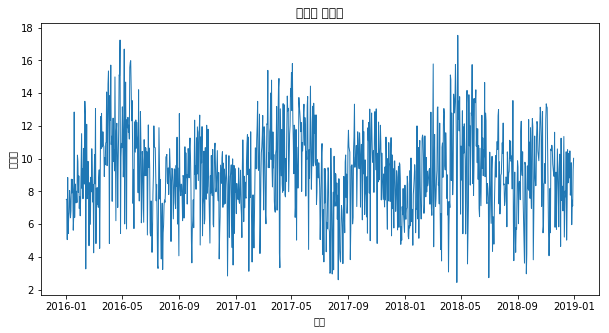

In [89]:
plt.figure(figsize=(10,5))
plt.plot(weather_avg.index, weather_avg['일교차'])
plt.title('날짜별 일교차')
plt.xlabel('날짜')
plt.ylabel('일교차')
plt.show() 

4. 평균풍속

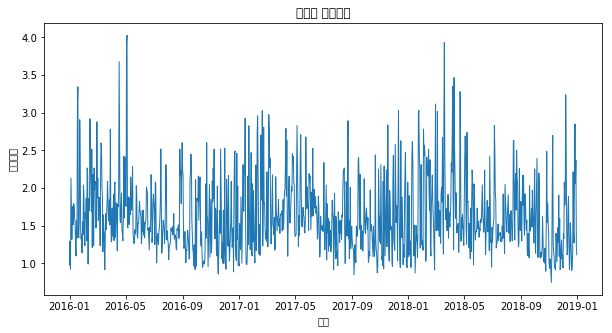

In [90]:
plt.figure(figsize=(10,5))
plt.plot(weather_avg.index, weather_avg['평균풍속'])
plt.title('날짜별 평균풍속')
plt.xlabel('날짜')
plt.ylabel('평균풍속')
plt.show() # 날짜별 평균풍속 그래프

5. 미세먼지농도

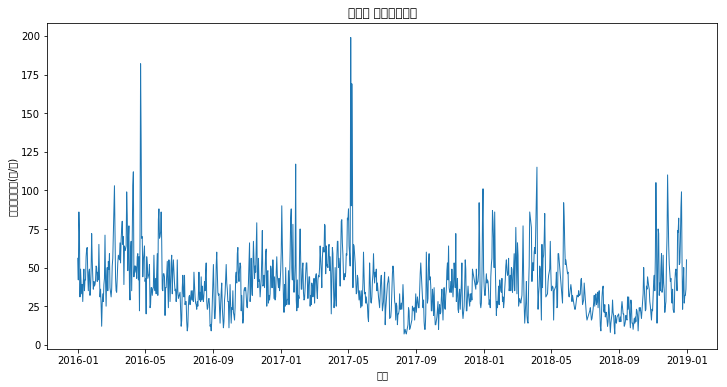

In [91]:
plt.figure(figsize=(12,6))
plt.plot(weather_avg.index, weather_avg['미세먼지농도(㎍/㎥)'])
plt.title('날짜별 미세먼지농도')
plt.xlabel('날짜', fontsize=10)
plt.ylabel('미세먼지농도(㎍/㎥)', fontsize=10)
plt.show() # 날짜별 미세먼지농도(㎍/㎥)

6. 상대습도

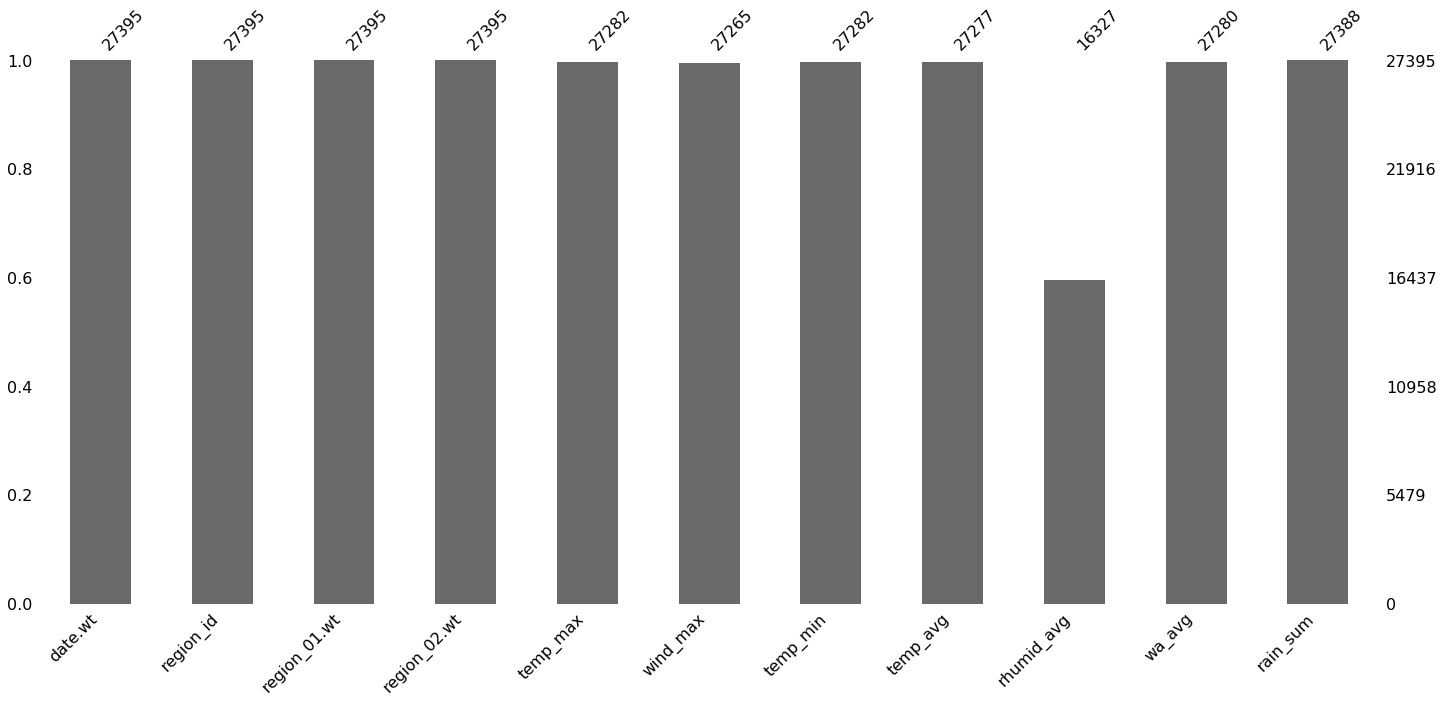

In [92]:
# 결측치 확인
weather = pd.read_csv("C:/Users/Yenny/Documents/weathercontest/data/유통&소셜 데이터/bigcon_weather.csv", encoding ='CP949', parse_dates=['date.wt'])
weather_seoul = weather[weather['region_01.wt']=='서울특별시'] 
msno.bar(weather_seoul)
plt.show()

In [93]:
weather_seoul = weather_seoul.interpolate(method='values') # 데이터 프레임 값에 선형으로 비례하는 결측값 보간
weather_avg = weather_seoul.groupby(['date.wt']).mean()

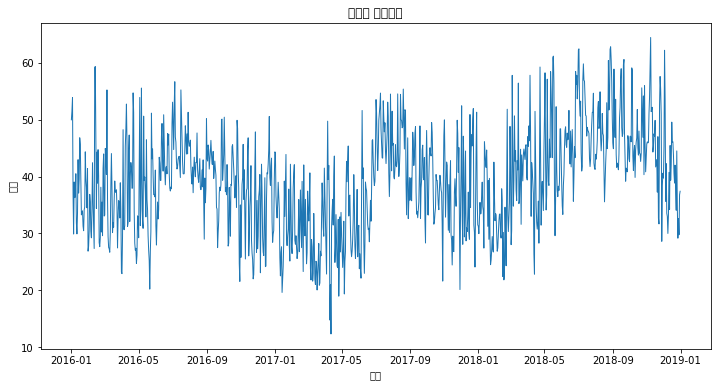

In [94]:
plt.figure(figsize=(12,6))
plt.plot(weather_avg.index, weather_avg['rhumid_avg'])
plt.title('날짜별 평균습도')
plt.xlabel('날짜', fontsize=10)
plt.ylabel('습도', fontsize=10)
plt.show() 

In [95]:
# 데이터 저장
#weather_avg = weather_avg.reset_index()
#weather_avg.to_csv('/Users/hankiho/Desktop/weather_avg.csv', index = False, encoding = "utf-8-sig")